In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as so
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv('babies.csv')

In [ ]:
# 1
len(df)

1236

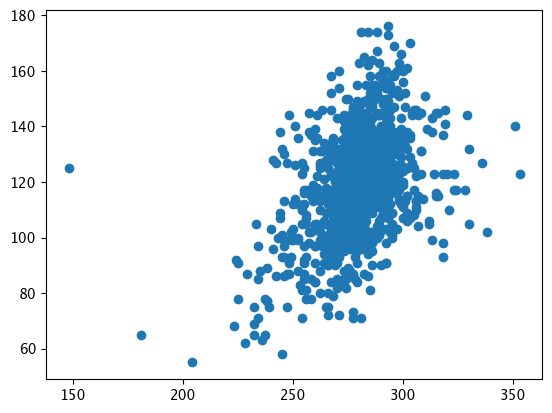

In [ ]:
# 2
plt.scatter(x=df['gestation'], y=df['bwt'])

In [27]:
# Count observations where either 'birth rate' or 'pregnancy length (gestation)' is missing
missing_count = df[['bwt', 'gestation']].isnull().sum()
missing_count

df['missing'] = np.isnan(df.gestation + df.bwt)
df.missing.sum()

np.int64(13)

In [29]:
E = df[~df.missing]
E.shape

(1223, 9)

In [24]:
def simpleRegPredict(b, x):
    yp = b[0] + x * b[1]
    return yp

def simpleRegLossRSS(b, x, y, fcn=simpleRegPredict):
    deriv = [0,0]

    yp = fcn(b, x)
    residual = (y - yp)
    RSS = np.sum(residual ** 2)
    deriv[0] = -2 * np.sum(residual)
    deriv[1] = -2 * np.sum(residual * x)

    return RSS, deriv

def simpleRegLossL1(b, x, y, fcn=simpleRegPredict):
    deriv = [0,0]

    yp = fcn(b, x)
    residual = (y - yp)
    L1 = np.sum(abs(residual))
    deriv[0] = -2 * np.sum(np.sign(residual))
    deriv[1] = -2 * np.sum(np.sign(residual) * x)

    return L1, deriv

def plotPrediction(b, x, y, fcn=simpleRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')

def simpleRegFit(x, y, fcn):
    b0 = np.zeros(2)

    # (a)
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    # (b)
    plotPrediction(b, x, y)

    # (c)
    RSS = fcn(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2, b


array([-17.28596811,   0.48973231])

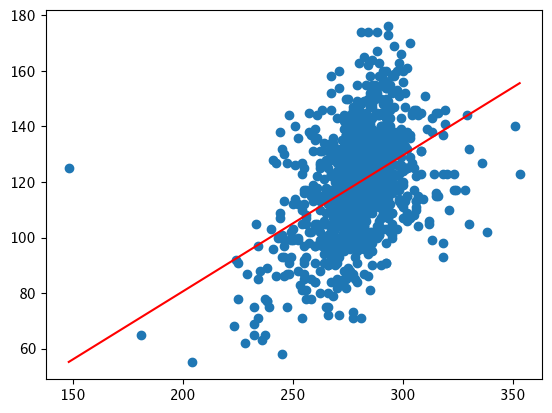

In [31]:
x = df['gestation']
y= df['bwt']

R2, b = simpleRegFit(x, y, simpleRegLossRSS)
b

array([-32.72727273,   0.54545455])

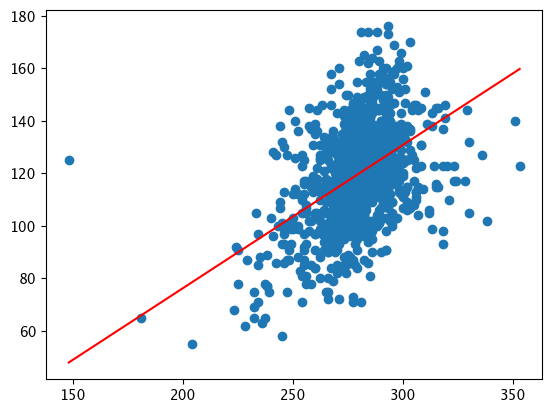

In [25]:
x = df['gestation']
y= df['bwt']

R2, b = simpleRegFit(x, y, simpleRegLossL1)
b

In [44]:
def polyRegPredict(b, x):
    yp = np.zeros(x.shape)
    for i in range(len(b)):
        yp += b[i] * (x ** i)

    return yp

def polyRegLossRSS(b, x, y, fcn=polyRegPredict):
    deriv = np.zeros(len(b))

    yp = fcn(b, x)
    residual = (y - yp)
    RSS = np.sum(residual ** 2)
    for i in range(len(b)):
        deriv[i] = -2 * np.sum(residual * (x ** i))

    return RSS, deriv

def plotPrediction(b, x, y, fcn=polyRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')


def polyRegFit(x, y, order):
    fcn = polyRegLossRSS
    b0 = np.zeros(order+1)

    # (a)
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    # (b)
    plotPrediction(b, x, y)

    # (c)
    RSS = fcn(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2, b

0.2212701514858414


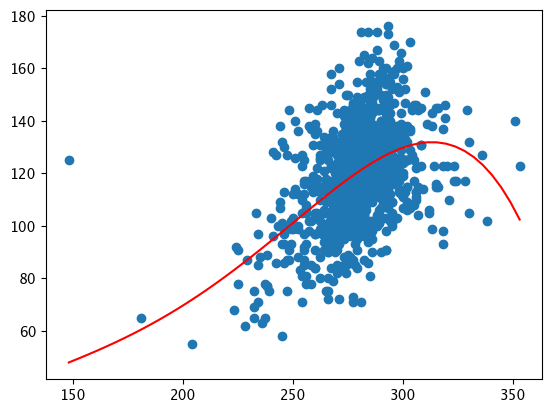

In [ ]:
x = df['gestation']
y = df['bwt']
R2, b = polyRegFit(x, y, 5)
print(R2)


[ 1.01700672e-03  4.91418289e-02  7.72359703e-03 -7.69198439e-05
  3.17210216e-07 -4.41392281e-10]


array([87.58721056])

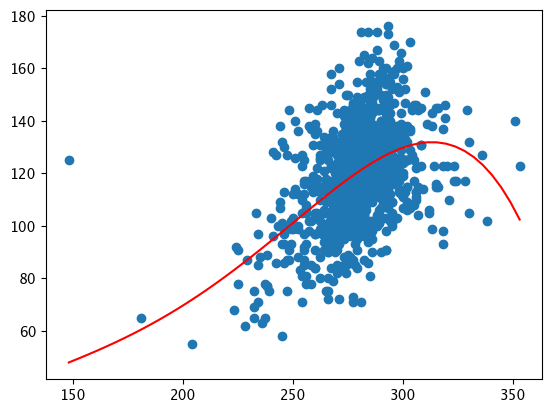

In [53]:
x = df['gestation']
y = df['bwt']
R2, b = polyRegFit(x, y, 5)
print(b)

x = np.array([230])

polyRegPredict(b, x)